In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("nba_2013.csv")

In [3]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

There are null values in some columns so need to fix them

In [5]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [6]:
data['fg.']=data['fg.'].fillna(data['fg.'].mean())
data['x3p.']=data['x3p.'].fillna(data['x3p.'].mean())
data['x2p.']=data['x2p.'].fillna(data['x2p.'].mean())
data['efg.']=data['efg.'].fillna(data['efg.'].mean())
data['ft.']=data['ft.'].fillna(data['ft.'].mean())

In [7]:
data.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [8]:
data['season'].unique()

array(['2013-2014'], dtype=object)

In [9]:
data['season_end'].unique()

array([2013], dtype=int64)

In season,season_end columns there is only one value that can not play role in analysis, so we can drop them

In [10]:
data=data.drop(['season','season_end'],axis=1)

let's check whether there is a outliers in dataset or not

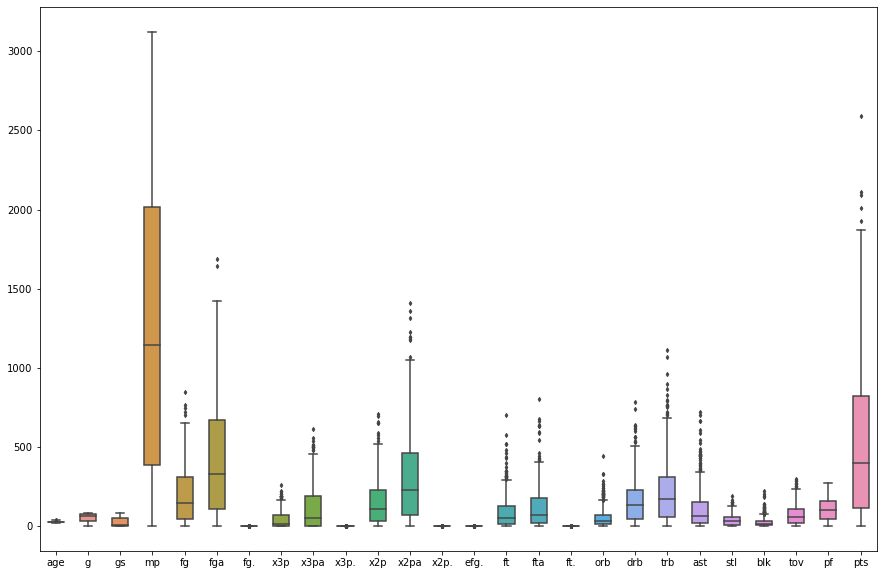

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [12]:
q = data['fg'].quantile(0.99)
data_cleaned = data[data['fg']<q]

q = data_cleaned['x3p'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['x3p']<q]


q = data_cleaned['x3pa'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['x3pa']<q]


q = data_cleaned['x2p'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['x2p']<q]

q = data_cleaned['x2pa'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['x2pa']<q]

q = data_cleaned['ft'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['ft']<q]

q = data_cleaned['fta'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['fta']<q]


q = data_cleaned['orb'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['orb']<q]


q = data_cleaned['drb'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['drb']<q]

q = data_cleaned['ast'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['ast']<q]

q = data_cleaned['pts'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['pts']<q]

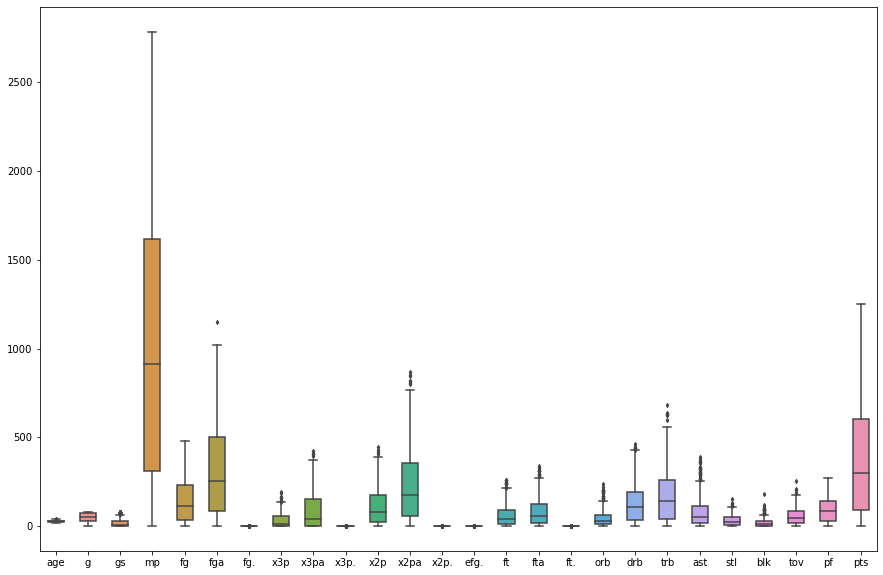

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

now almost ouliers are removed, let's start working on object columns

In [14]:
position=pd.get_dummies(data_cleaned['pos'],drop_first=True)

In [15]:
data_cleaned=pd.concat([data_cleaned,position],axis=1)

In [16]:
data_cleaned=data_cleaned.drop(['pos'],axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encd=LabelEncoder()
data_cleaned['bref_team_id']=label_encd.fit_transform(data_cleaned['bref_team_id'])

In [18]:
data_cleaned=data_cleaned.drop(['player'],axis=1)

In [19]:
# data_cleaned=data_cleaned.drop(['player','bref_team_id','pos'],axis=1)

In [20]:
X=data_cleaned.drop(['pts'],axis=1)
y=data_cleaned['pts']

In [21]:
from sklearn.preprocessing import StandardScaler
scalar =StandardScaler()
X_scaled = scalar.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9033 for k_value: 1
Regression score is: 0.9262 for k_value: 2
Regression score is: 0.9399 for k_value: 3
Regression score is: 0.9533 for k_value: 4
Regression score is: 0.9524 for k_value: 5
Regression score is: 0.9499 for k_value: 6
Regression score is: 0.9542 for k_value: 7
Regression score is: 0.9553 for k_value: 8
Regression score is: 0.9518 for k_value: 9
Regression score is: 0.9483 for k_value: 10


In [24]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 5037.6623775
Regression score is: 0.9553
